# K-means clustering Algorithm

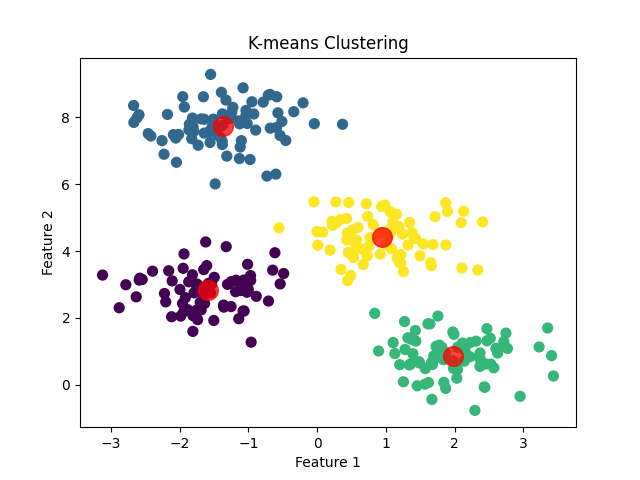

K-means clustering is a popular unsupervised machine learning algorithm used to partition a dataset into 
K distinct, non-overlapping clusters. The algorithm aims to minimize the variance within each cluster, making the data points within each cluster as similar as possible. Here's an overview of how K-means clustering works, along with an example in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PyQt5 
%matplotlib qt

In [6]:
from sklearn.datasets import make_blobs

# Generate sample data
data = make_blobs(n_samples=300,n_features=2, centers=4, cluster_std=1.8, random_state=101)


#visualization
sns.set_style('whitegrid')
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
X=data[0]




In [7]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [8]:
from sklearn.cluster import KMeans
# Fit the KMeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)

# Get the cluster centers and labels
centroids = kmeans.cluster_centers_
print("centroids:\n",centroids)

# labels = kmeans.labels_

labels=kmeans.predict(X_scaled)
print("labels",labels)

centroids:
 [[-1.36353344 -1.51769456]
 [ 0.4641684  -0.03530184]
 [ 1.21226382  0.76190746]
 [-0.27254509  0.90302834]]
labels [3 2 1 3 3 0 1 1 1 2 1 1 1 3 0 2 0 3 1 1 0 0 0 3 1 3 2 3 0 2 1 1 1 1 2 2 3
 1 1 2 0 2 2 3 0 3 0 1 3 1 2 1 2 2 3 0 0 0 3 2 0 3 3 2 0 3 3 1 1 3 0 3 1 0
 0 2 2 1 2 0 3 1 1 0 1 1 1 1 0 0 0 0 0 0 1 2 0 1 3 1 1 0 1 1 3 3 3 0 1 1 1
 2 1 3 0 1 0 1 3 3 0 0 1 3 1 3 3 2 2 3 3 2 3 3 0 1 1 1 3 2 3 2 2 2 0 3 2 2
 3 2 3 1 0 2 2 0 3 0 2 3 0 2 0 1 2 1 1 1 3 3 2 0 0 2 1 1 3 0 2 3 2 0 1 1 1
 2 3 0 1 2 0 2 3 1 2 1 2 3 2 1 2 2 1 2 3 3 3 1 0 3 0 1 1 1 3 0 1 0 2 1 0 2
 2 3 3 3 1 2 3 3 1 1 1 0 1 2 3 0 0 2 3 1 0 3 0 3 1 0 2 1 2 0 0 2 1 1 1 0 3
 0 1 3 0 0 0 3 0 0 0 2 2 1 3 2 2 3 0 3 2 2 1 0 3 0 2 1 3 0 0 0 1 2 0 2 2 0
 1 2 3 1]


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
# Plot the data points and the cluster centers
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

# SILHOUETTE SCORE

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
def optimal_kmeans(dataset,normalized_dataset,start=2,end=11):
    n_clu=[]
    km_ss=[]
    for n_cluster in range(start,end):
        kmeans=KMeans(n_clusters=n_cluster)
        labels=kmeans.fit_predict(normalized_dataset)
        silhoutte_avg=round(silhouette_score(normalized_dataset,labels,random_state=101),3)
        km_ss.append(silhoutte_avg)
        n_clu.append(n_cluster)
        
        print('No.cluster:{}, silhoutte.score: {}'.format(n_cluster,silhoutte_avg))
        
        if n_cluster==end-1:
            sns.pointplot(x=n_clu,y=km_ss)
            
optimal_kmeans(X,X_scaled,start=2,end=11)

c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

No.cluster:2, silhoutte.score: 0.648
No.cluster:3, silhoutte.score: 0.492
No.cluster:4, silhoutte.score: 0.539
No.cluster:5, silhoutte.score: 0.494
No.cluster:6, silhoutte.score: 0.392
No.cluster:7, silhoutte.score: 0.358


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


No.cluster:8, silhoutte.score: 0.354
No.cluster:9, silhoutte.score: 0.345
No.cluster:10, silhoutte.score: 0.344
